In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

In [34]:
#Design a query to retrieve the last 12 moths of precipitation data and plot the results
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
dates = dt.date(2017,8,23) - dt.timedelta(days=365)
dates


datetime.date(2016, 8, 23)

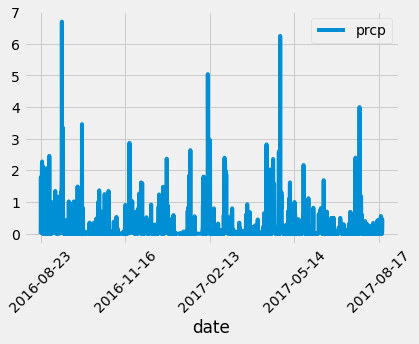

In [33]:
#run query and filter for 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >="2016-08-23").\
    filter(Measurement.date <="2017-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data).set_index('date')

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date').dropna()
precipitation_df
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot=45)
plt.savefig("Precipitation Analysis.png")
plt.title("Last 12 Months of Precipitation")
plt.show()


In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number stations in the dataset
station_total = session.query(Station.id).count()
print(f"There are {station_total} stations in the dataset")

There are 9 stations in the dataset


In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
session.query(func.min(Measurement.tobs),
func.max(Measurement.tobs),
func.avg(Measurement.tobs)).filter(Measurement.station == station_number).all()


[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

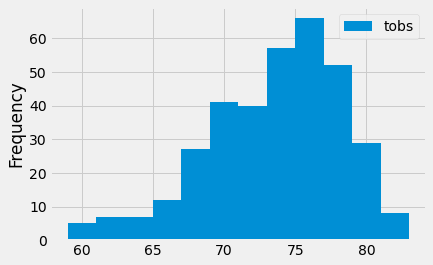

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observations = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date>="2016-08-24").\
        filter(Measurement.date<="2017-08-24").\
            filter(Measurement.station == station_number).all()
#convert to dataframe
observation_df = pd.DataFrame(temperature_observations)

#histogram
observation_df.plot.hist(bins=12)


# Close session

In [ ]:
# Close Session
session.close()